In [1]:
#Hi gang! I make vines. Lol lets go.

import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from random import randint
import random

(0.36569206994328973, 2.1429109765993872, 2.221875, 19.340625)

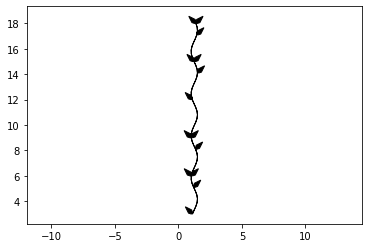

In [20]:
#Paramaters
random.seed(271) #make deterministic
top = 18
bot = 3
amp = 0.25
width = 0.5
omega = 1.89
res = 0.3
data = [1,2,3] #1 is left leaf, 2 is right, 3 is both
interval = 1

#Leaf param
size = 0.5
side1 = 0.25*np.array([1,0])*size
side2 = 0.125*np.array([3,1])*size
side3 = 0.5*np.array([1,2])*size
side4 = 0.5*np.array([-2,-1])*size
side5 = 0.125*np.array([-1,-3])*size

#generate vine spine
spine = []
for i in np.linspace(bot,top,int(1 + (top-bot)/res)):
    spine.append([amp*np.sin(i * omega)+1, i])

verts = []

#Work up the right side, adding leaves as needed
counter = 0
for i in spine:
    x = i[0]
    y = i[1]
    if len(data) <= counter:
        counter = 0
    if (i[1]%interval)< 0.5*res and (data[counter] == 3 or data[counter] == 2):
        #Leaf time lets go
        current = [x+width/2,y]
        verts.append(current)
        current = current + side1
        verts.append(current)
        current = current + side2
        verts.append(current)
        current = current + side3
        verts.append(current)
        current = current + side4
        verts.append(current)
        current = current + side5
        verts.append(current)
        verts.append( [x+width/2,y])
        counter += 1
    else:
        verts.append( [x+width/2,y])
        counter += 1

#down
counter = -1
for i in reversed(spine):
    x = i[0]
    y = i[1]
    if len(data) <= abs(counter):
        counter = -1
    if (i[1]%interval)< 0.5*res and (data[counter] == 3 or data[counter] == 1):
        #LEAF TIME
        current = [x+width/2,y]
        verts.append(current)
        current = current - np.array([1,-1])*side1
        verts.append(current)
        current = current - np.array([1,-1])*side2
        verts.append(current)
        current = current - np.array([1,-1])*side3
        verts.append(current)
        current = current - np.array([1,-1])*side4
        verts.append(current)
        current = current - np.array([1,-1])*side5
        verts.append(current)
        verts.append( [x+width/2,y])
        counter -= 1
    else:
        verts.append( [x+width/2,y])
        counter -= 1

polygon = verts
plt.fill(*zip(*polygon), color = 'black')
plt.axis('equal')